In [ ]:
import pandas as pd
df1 = pd.read_csv('./EventEmbedding.csv', index_col=[0])
df1 = df1.drop(columns=['X1'])


In [ ]:
df1 = df1.sort_values('time',axis=0, ascending=False)
other_col = df1.iloc[:, 52:]
df1 = df1.drop(columns=list(other_col.columns))
df1.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33,E34,E35,E36,E37,E38,E39,E40,E41,E42,E43,E44,E45,E46,E47,E48,E49,E50,time,stock
724,-0.079701,-0.083346,-0.061835,-0.111072,-0.102169,-0.112476,-0.088395,-0.108062,-0.020840,-0.003680,-0.069303,-0.068889,-0.087593,-0.078979,-0.066800,-0.107586,-0.074998,-0.062850,-0.048663,-0.006205,-0.140627,-0.114700,-0.026017,-0.033791,-0.229517,-0.037461,-0.118226,-0.085218,-0.037699,-0.175983,-0.044004,-0.080869,-0.179419,-0.157930,-0.113075,-0.150211,0.001384,-0.092613,-0.040187,-0.082924,-0.060497,-0.077408,-0.104431,-0.063011,-0.087347,-0.152544,-0.112174,-0.087322,-0.057331,-0.073052,2020/6/9,0
785,0.052576,0.039629,-0.021333,-0.027418,-0.016816,0.025661,0.042738,0.037734,-0.039179,-0.011490,-0.077098,-0.011935,-0.030697,0.079773,-0.048529,0.072808,-0.067881,0.007486,-0.036817,0.061247,0.018495,0.010942,-0.033720,0.025200,0.038138,0.122196,-0.036629,0.033969,0.062787,-0.014764,-0.043901,-0.070594,-0.056537,-0.007813,0.006234,-0.066805,-0.053116,-0.095500,-0.008339,-0.028990,0.043849,0.035319,-0.027999,0.055586,-0.090674,-0.032775,0.016485,0.038197,0.091257,-0.022854,2020/6/9,0
805,0.105545,0.121575,0.081482,0.060660,0.056986,0.147606,0.115819,0.124168,0.088284,0.115534,0.062606,0.131915,0.135808,0.127823,0.056396,0.112368,0.074051,0.099964,0.064832,0.141094,0.055066,0.071441,0.086145,0.114262,0.048888,0.154090,0.090141,0.134790,0.124993,0.065393,0.073791,0.089892,0.051817,0.095107,0.101698,0.076683,0.053316,0.036176,0.077478,0.058417,0.151966,0.116767,0.065269,0.118967,0.071522,0.088381,0.102527,0.066834,0.133998,0.139025,2020/6/9,0
260,-0.057935,0.030721,0.034174,-0.129930,-0.128751,-0.030213,-0.052582,-0.005385,-0.018431,-0.034012,-0.067386,-0.050816,0.022666,-0.058570,-0.072008,-0.085394,-0.139445,-0.040824,-0.047823,0.025440,-0.056975,-0.066107,-0.023310,0.001697,-0.095930,0.025540,-0.098776,-0.048771,0.050318,-0.095009,-0.012484,-0.035227,-0.113888,-0.077411,-0.085006,-0.008019,0.033304,-0.130288,-0.099634,-0.135161,-0.012071,-0.048381,-0.046259,-0.070710,-0.068922,-0.075297,-0.040254,-0.023646,0.003777,-0.052249,2020/6/9,0
313,0.747324,0.770225,0.773265,0.771981,0.758346,0.790585,0.765518,0.754886,0.761118,0.733072,0.744229,0.748316,0.786134,0.788992,0.752830,0.770387,0.762822,0.734445,0.759142,0.774945,0.751826,0.755623,0.750153,0.783072,0.753455,0.798615,0.756159,0.770907,0.772031,0.768788,0.749201,0.750504,0.752396,0.754948,0.763071,0.776463,0.737289,0.759398,0.769369,0.753126,0.771655,0.771284,0.741167,0.758303,0.767034,0.756633,0.755132,0.752352,0.771678,0.783490,2020/6/9,0


In [ ]:
df1 = df1.groupby(['time','stock'], as_index=False).mean()
# 因為groupby會把欄位吃掉 所以要用as_index=False
df1

,time,stock,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33,E34,E35,E36,E37,E38,E39,E40,E41,E42,E43,E44,E45,E46,E47,E48,E49,E50
0,2020/1/24,0,-0.017957,-0.027962,-0.010966,-0.058662,-0.034743,0.018000,-0.045377,-0.024422,-0.021718,-0.044911,-0.056835,-0.032559,-0.019580,-0.026944,-0.097598,-0.037754,-0.069742,-0.023161,-0.061094,-0.010888,-0.066140,-0.086927,-0.014015,-0.032145,-0.068741,0.055277,-0.056597,-0.026673,-0.021356,-0.050585,-0.051243,-0.059264,-0.107912,-0.004577,-0.027333,-0.069384,-0.048633,-0.086606,-0.031313,-0.062751,0.017650,-0.031930,-0.032259,-0.026274,-0.078578,-0.065015,-0.032121,0.002224,0.014000,-0.038499
1,2020/1/27,0,0.473817,0.473548,0.432392,0.430312,0.432874,0.458868,0.465753,0.464136,0.428223,0.432708,0.402114,0.435997,0.423428,0.494498,0.416727,0.486246,0.415504,0.442698,0.425963,0.483887,0.463614,0.457158,0.430799,0.465999,0.461752,0.516372,0.423444,0.465992,0.477454,0.437604,0.416482,0.399983,0.420259,0.444772,0.450050,0.406499,0.410931,0.392874,0.435347,0.431090,0.478336,0.469009,0.434193,0.470122,0.396513,0.435194,0.458181,0.460473,0.492767,0.439686
2,2020/1/28,1,0.307285,0.307531,0.316829,0.299861,0.285174,0.334868,0.330989,0.253056,0.307448,0.234634,0.268579,0.293640,0.382636,0.344992,0.186718,0.308352,0.252340,0.292292,0.263091,0.368045,0.314385,0.276313,0.297345,0.322550,0.234553,0.405761,0.254215,0.284235,0.348575,0.322728,0.238394,0.227625,0.251410,0.291714,0.321145,0.259247,0.268698,0.256880,0.295457,0.248164,0.392972,0.296665,0.273202,0.304433,0.238863,0.242031,0.319201,0.325812,0.372445,0.337254
3,2020/1/29,0,0.109616,0.120251,-0.008030,-0.020051,0.014871,0.081921,0.065903,0.084361,0.042871,0.075140,0.021661,0.107121,0.095978,0.129728,0.037291,0.067612,0.020962,0.067059,0.020319,0.086837,0.029427,0.034773,0.089639,0.055644,0.066916,0.169336,0.036517,0.111726,0.098361,0.038563,0.039516,0.036384,0.038900,0.065370,0.070458,0.059502,0.000424,-0.007623,0.032593,0.024713,0.101612,0.079895,0.020043,0.051901,0.058622,0.070230,0.080068,0.067759,0.082953,0.076366
4,2020/1/30,1,0.478432,0.469221,0.445141,0.437073,0.439789,0.487451,0.455084,0.454844,0.454888,0.462822,0.448521,0.454772,0.477361,0.480414,0.454499,0.459958,0.428566,0.439029,0.437401,0.485581,0.443375,0.426391,0.452335,0.482924,0.431517,0.499814,0.442362,0.477510,0.464842,0.435272,0.443276,0.449776,0.409017,0.458512,0.460901,0.453770,0.421884,0.433091,0.450462,0.430032,0.483798,0.440258,0.435160,0.480917,0.435324,0.442082,0.433684,0.441099,0.472587,0.485715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020/6/3,1,0.627774,0.644377,0.608759,0.604380,0.623734,0.649522,0.639649,0.616013,0.621377,0.599572,0.596132,0.626927,0.626311,0.643263,0.608188,0.631796,0.608740,0.619645,0.576766,0.659355,0.620774,0.616167,0.600086,0.652190,0.616326,0.660242,0.633752,0.614630,0.651133,0.600486,0.615419,0.599446,0.608537,0.603046,0.634798,0.622633,0.599656,0.608562,0.623286,0.624883,0.619365,0.619313,0.604011,0.643894,0.609583,0.621356,0.624022,0.613126,0.637180,0.646594
87,2020/6/4,0,0.251298,0.269572,0.223321,0.209358,0.218320,0.258418,0.250234,0.251755,0.235423,0.236274,0.210193,0.238586,0.259711,0.255835,0.217516,0.237664,0.219583,0.224481,0.207400,0.261767,0.226079,0.228809,0.222863,0.251748,0.222167,0.287478,0.232251,0.244604,0.261445,0.215211,0.229309,0.224696,0.206360,0.241094,0.253758,0.216987,0.223810,0.195418,0.238499,0.215694,0.274848,0.229266,0.224652,0.254153,0.216173,0.235611,0.226051,0.249596,0.268182,0.249806
88,2020/6/5,1,0.498907,0.525649,0.484143,0.478756,0.474114,0.526692,0.503161,0.492558,0.491845,0.489249,0.473022,0.497395,0.512787,0.509303,0.476449,0.514639,0.476023,0.479496,0.473842,0.521727,0.485342,0.475237,0.482220,0.518416,0.475962,0.543730,0.482385,0.514320,0.528661,0.492715,0.493

In [ ]:
len(list(df1.columns))

52

In [ ]:
feature = df1.iloc[:, 2:]
label = df1.iloc[:, 1]


In [ ]:
feature.iloc[0,:]
label[0]

0

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(feature,label, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
X_train = []
y_train = []
for i in range(0,len(feature)):
  X_train.append(feature.iloc[i,:])
  y_train.append(label.iloc[i])


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
#X_test = np.array(X_test)
#y_test = np.array(y_test)

In [ ]:
import collections
#0代表跌 1代表漲
print(collections.Counter(y_train))

Counter({0: 46, 1: 45})


In [ ]:
y_train.shape

(91,)

In [ ]:
X_train.shape

(91, 50, 1)

In [ ]:
#X_test.shape

(19, 50, 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#91: 資料筆數
#50: 特徵
#1: 特徵數量
#對於input_shape (50,1)需要

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten


In [ ]:
#n_timestep = X_train.shape[0]
#n_feature= X_train.shape[1]
#n_outputs=  y_train
model  = Sequential() 
model.add(Conv1D(8, 1, activation="relu",strides=2, input_shape=(X_train.shape[1],1)))
model.add(Conv1D(4, 1,activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = "adam",metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_45 (Conv1D)           (None, 25, 8)             16        
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 25, 4)             36        
_________________________________________________________________
flatten_28 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 202       
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 200)
#history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 1000)

Epoch 1/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5055
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5055
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5055
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5165
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5165
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5165
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5165
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5165
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5275
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5275
Epoch 11/200
3/3 [===========

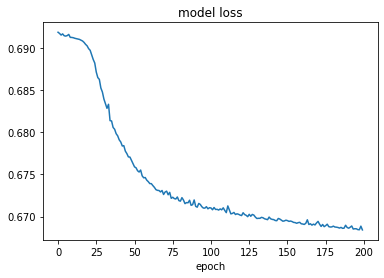

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('model loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pred_y = model.predict(X_train)
pred_y